通常，衡量一个算法的表现(Performance)，我们必须考虑偏差(Bias)和方差(Variance)。数学家和统计学家会这么叫，物理学家喜欢叫系统误差和随机误差。

下图直观地展示了什么是Bias，什么是Variance。

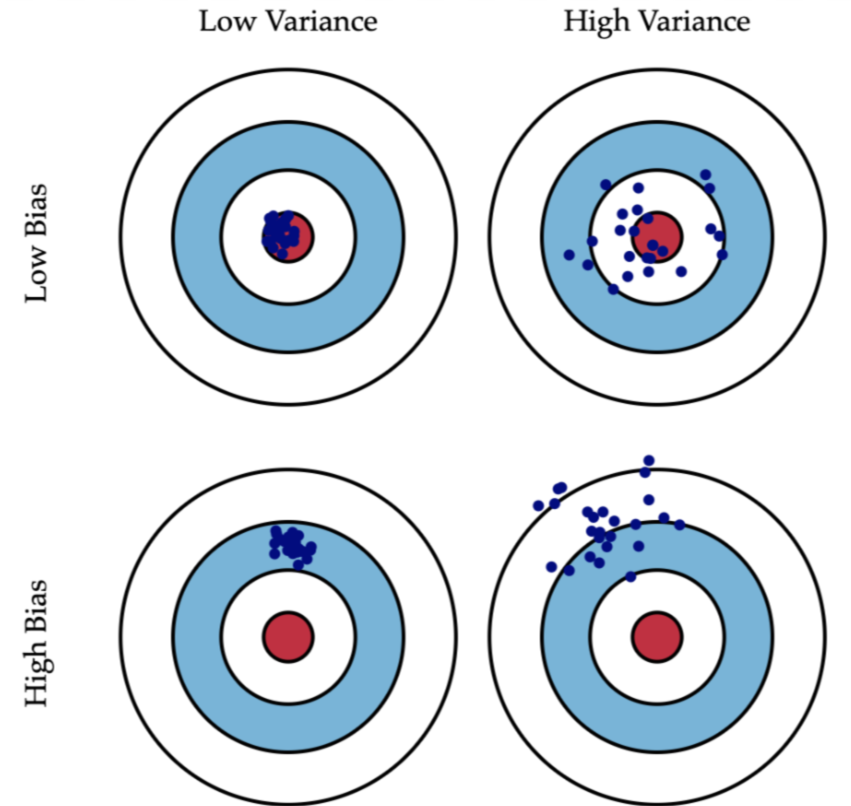

那么为什么MC中只考虑Variance呢？————因为Bias是0。我把Proof写在了最后面。

也就是说，**MC们要么是左上角，要么是右上角，那当然方差越小越好。**

可惜，在机器学习中，Bias 和 Variance 很多时候是不可兼得的。称为 Bias-Variance-Tradeoff，很多时候你要牺牲一些Bias去换取Variance。众多机器学习算法均要面临此鱼与熊掌不可得兼的困境，见[维基百科上的此页面](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Approaches)。简单地说，模型复杂度低的时候Bias大而Variance小，模型复杂度g高的时候Bias小而Variance大。

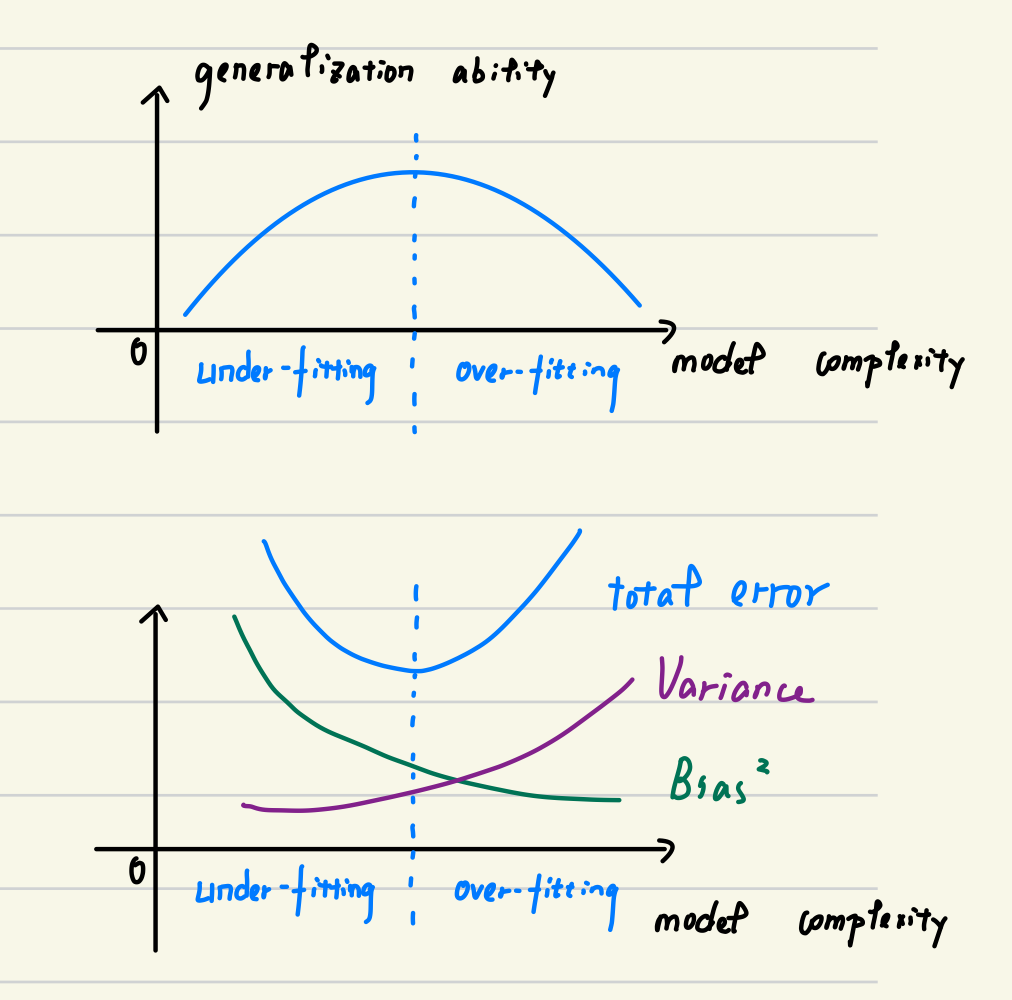

P.S.: 粗略地说，传统的物理只能解决行星运动这类“简单”的问题、传统的统计只能解决估算积分这类“简单”的问题，而机器学习可以解决对植物分类（鸢尾数据集）、预测癌症阴性阳性（威斯康星乳腺癌数据集）、预测房价（波士顿房价数据集）、预测手写数字（MNIST）、预测下一个单词/token（Large Language Model）这些更“复杂”的问题，这些复杂的问题通常没有万有引力定律或者重要采样那种精确的数学公式来描述。但是有精确数学公式描述的问题用机器学习就有些浪费时间了，比如，没有人会去用机器学习预测单摆轨道或者海王星轨道。

P.S.: 在机器学习中，如果你用的Error是Mean Square Error，则$MSE = Bias^2 + Variance$是严格成立的，其他时候并不是。

P.S.: 在统计中，希望大家还记得，统计学家希望点估计（包括所谓的极大似然估计和矩估计）有无偏性、相合性(consistent in probability)、有效性（方差较小）。但无偏的算法在现实中、在机器学习里不一定好。因为无偏的算法通常会有较大的方差。

## Estimating $\pi$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi_basic(N):
    np.random.seed(10)  # For reproducibility
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    r = 0.5  # Radius of the circle
    center = np.array([0.5, 0.5])

    # Compute distance from the center
    distances = (x - center[0])**2 + (y - center[1])**2

    # Count the number of points inside the circle
    inside_circle = distances <= r**2
    N_inside = np.sum(inside_circle)

    # Estimate pi
    pi_estimate = 4 * N_inside / N
    return pi_estimate

def estimate_pi_stratified(N, strata = 10):
    np.random.seed(10)
    N_per_stratum = N // (strata ** 2)
    x = np.zeros(N)
    y = np.zeros(N)
    count = 0
    for i in range(strata):
        for j in range(strata):
            x_low = i / strata
            x_high = (i + 1) / strata
            y_low = j / strata
            y_high = (j + 1) / strata
            x[count:count+N_per_stratum] = np.random.uniform(x_low, x_high, N_per_stratum)
            y[count:count+N_per_stratum] = np.random.uniform(y_low, y_high, N_per_stratum)
            count += N_per_stratum

    # Handle any leftover points due to integer division
    if count < N:
        x[count:] = np.random.uniform(0, 1, N - count)
        y[count:] = np.random.uniform(0, 1, N - count)

    r = 0.5  # Radius of the circle
    center = np.array([0.5, 0.5])

    # Compute distance from the center
    distances = (x - center[0])**2 + (y - center[1])**2

    # Count the number of points inside the circle
    inside_circle = distances <= r**2
    N_inside = np.sum(inside_circle)

    # Estimate pi
    pi_estimate = 4 * N_inside / N
    return pi_estimate

def estimate_pi_antithetic(N):
    np.random.seed(10)
    N_half = N // 2
    x = np.random.uniform(0, 1, N_half)
    y = np.random.uniform(0, 1, N_half)
    x_antithetic = 1 - x
    y_antithetic = 1 - y

    x_full = np.concatenate((x, x_antithetic))
    y_full = np.concatenate((y, y_antithetic))

    r = 0.5
    center = np.array([0.5, 0.5])
    distances = (x_full - center[0])**2 + (y_full - center[1])**2
    inside_circle = distances <= r**2
    N_inside = np.sum(inside_circle)
    pi_estimate = 4 * N_inside / N
    return pi_estimate


普通抽样就是咔咔洒点（当然是伪随机数），分层抽样把正方形分成很多个小正方形再洒点，对称抽样则对每个样本点选取其关于 $ y = x $ 的对称点。

In [2]:
# Example usage
N = 10 ** 4
pi_basic = estimate_pi_basic(N)
pi_stratified = estimate_pi_stratified(N, strata = 10)
pi_antithetic = estimate_pi_antithetic(N)

print(f"Estimated pi using basic Monte Carlo: {pi_basic}")
print(f"Estimated pi using stratified sampling: {pi_stratified}")
print(f"Estimated pi using antithetic sampling: {pi_antithetic}")
print(f"Actual pi: {np.pi}")

Estimated pi using basic Monte Carlo: 3.1176
Estimated pi using stratified sampling: 3.1328
Estimated pi using antithetic sampling: 3.1192
Actual pi: 3.141592653589793


可以看出分层抽样和对称抽样的效果似乎好一些，接下来我们多算几个N，画图看看

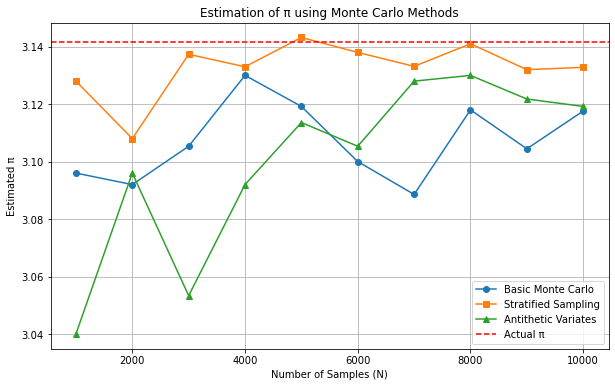

In [5]:
# Now, let's plot the estimated π values for N from 10^4 to 10^5
Ns = np.arange(1e3, 1e4+1, 1e3, dtype=int)  # N values from 10^4 to 10^5 in steps of 10^4

pi_basic_estimates = []
pi_stratified_estimates = []
pi_antithetic_estimates = []

for N in Ns:
    pi_basic = estimate_pi_basic(N)
    pi_basic_estimates.append(pi_basic)
    
    pi_stratified = estimate_pi_stratified(N, strata = 10)
    pi_stratified_estimates.append(pi_stratified)

    pi_antithetic = estimate_pi_antithetic(N)
    pi_antithetic_estimates.append(pi_antithetic)

# Plotting all methods
plt.figure(figsize=(10,6))
plt.plot(Ns, pi_basic_estimates, 'o-', label='Basic Monte Carlo')
plt.plot(Ns, pi_stratified_estimates, 's-', label='Stratified Sampling')
plt.plot(Ns, pi_antithetic_estimates, '^-', label='Antithetic Variates')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual π')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Estimated π')
plt.title('Estimation of π using Monte Carlo Methods')
plt.legend()
plt.grid(True)
plt.show()

Emm, N的范围太小了，对数地取N并把x轴改成对数尺度应该更好些。

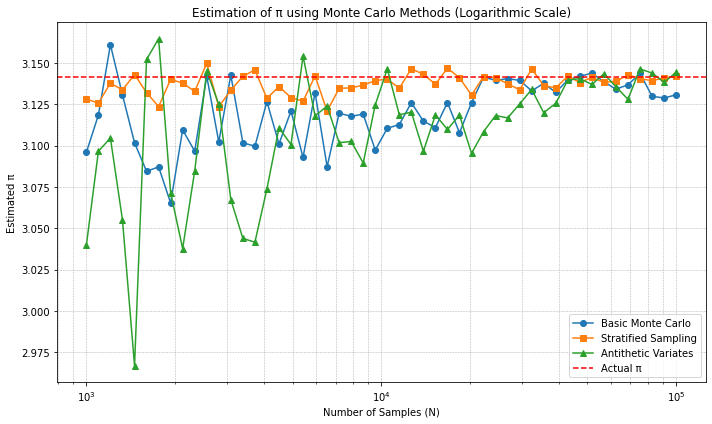

In [6]:
# Generate logarithmically spaced N values from 10^2 to 10^5
Ns = np.unique(np.logspace(3, 5, num=50, dtype=int))  # 50 points between 1e2 and 1e5

# Initialize lists to store π estimates
pi_basic_estimates = []
pi_stratified_estimates = []
pi_antithetic_estimates = []

# Compute π estimates for each N
for N in Ns:
    pi_basic = estimate_pi_basic(N)
    pi_basic_estimates.append(pi_basic)
    
    pi_stratified = estimate_pi_stratified(N, strata = 10)
    pi_stratified_estimates.append(pi_stratified)

    pi_antithetic = estimate_pi_antithetic(N)
    pi_antithetic_estimates.append(pi_antithetic)

# Plotting all methods using semilogx
plt.figure(figsize=(10, 6))
plt.semilogx(Ns, pi_basic_estimates, 'o-', label='Basic Monte Carlo')
plt.semilogx(Ns, pi_stratified_estimates, 's-', label='Stratified Sampling')
plt.semilogx(Ns, pi_antithetic_estimates, '^-', label='Antithetic Variates')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual π')

plt.xlabel('Number of Samples (N)')
plt.ylabel('Estimated π')
plt.title('Estimation of π using Monte Carlo Methods (Logarithmic Scale)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

不错！在我们看到，分层抽样（橙色）在此问题上比最简单方法（蓝色）要好，而对称抽样（绿色）效果反而不如最简单方法。

但是此图还不够好。想一想为什么？

除了画图验证外，最好有数字指标。机器学习论文里两个都会给。

In [7]:
# Calculate Deviance
actual_pi = np.pi

# Convert lists to NumPy arrays for vectorized operations
pi_basic_array = np.array(pi_basic_estimates)
pi_stratified_array = np.array(pi_stratified_estimates)
pi_antithetic_array = np.array(pi_antithetic_estimates)

# Calculate Absolute Deviance
absolute_dev_basic = np.abs(pi_basic_array - actual_pi)
absolute_dev_stratified = np.abs(pi_stratified_array - actual_pi)
absolute_dev_antithetic = np.abs(pi_antithetic_array - actual_pi)

# Calculate Mean Absolute Deviance (MAD)
mad_basic = np.mean(absolute_dev_basic)
mad_stratified = np.mean(absolute_dev_stratified)
mad_antithetic = np.mean(absolute_dev_antithetic)

# Print the MAD Results
print("Mean Absolute Deviance (MAD) from π:")
print(f"Basic Monte Carlo: {mad_basic:.6f}")
print(f"Stratified Sampling: {mad_stratified:.6f}")
print(f"Antithetic Variates: {mad_antithetic:.6f}\n")

# Calculate Squared Deviance
squared_dev_basic = (pi_basic_array - actual_pi) ** 2
squared_dev_stratified = (pi_stratified_array - actual_pi) ** 2
squared_dev_antithetic = (pi_antithetic_array - actual_pi) ** 2

# Calculate Root Mean Squared Error (RMSE)
rmse_basic = np.sqrt(np.mean(squared_dev_basic))
rmse_stratified = np.sqrt(np.mean(squared_dev_stratified))
rmse_antithetic = np.sqrt(np.mean(squared_dev_antithetic))

# Print the RMSE Results
print("Root Mean Squared Error (RMSE) from π:")
print(f"Basic Monte Carlo: {rmse_basic:.6f}")
print(f"Stratified Sampling: {rmse_stratified:.6f}")
print(f"Antithetic Variates: {rmse_antithetic:.6f}\n")

Mean Absolute Deviance (MAD) from π:
Basic Monte Carlo: 0.022269
Stratified Sampling: 0.005898
Antithetic Variates: 0.034953

Root Mean Squared Error (RMSE) from π:
Basic Monte Carlo: 0.029022
Stratified Sampling: 0.007920
Antithetic Variates: 0.049381



可以看出，分层抽样在估算$\pi$时比最简单方法误差更小。

## Estimating $\int_0^1 x^2 dx$

In [8]:
def monte_carlo_integration(func, a, b, n_samples, true_value):
    """
    Basic Monte Carlo integration to estimate the integral of a given function `func`
    over the interval [a, b] using `n_samples` random samples.
    """
    np.random.seed(42)
    x = np.random.uniform(a, b, n_samples)  # Random samples in [a, b]
    fx = func(x)  # Evaluate the function at sampled points
    estimate = (b - a) * np.mean(fx)  # Estimate of the integral
    abs_error = np.abs(estimate - true_value)  # Absolute error
    return estimate, abs_error

def stratified_sampling(func, a, b, n_samples, strata, true_value):
    """
    Monte Carlo integration using stratified sampling. 
    The interval [a, b] is divided into 'strata' subintervals.
    """
    np.random.seed(42)
    samples_per_stratum = n_samples // strata
    estimates = [
        (b - a) / strata * np.mean(func(np.random.uniform(a + i * (b - a) / strata,
                                                          a + (i + 1) * (b - a) / strata, 
                                                          samples_per_stratum)))
        for i in range(strata)
    ]
    estimate = sum(estimates)
    abs_error = np.abs(estimate - true_value)
    return estimate, abs_error

def importance_sampling(func, a, b, n_samples, true_value, importance_dist):
    """
    Monte Carlo integration using importance sampling.
    The probability distribution for sampling is given by 'importance_dist'.
    """
    # Sample from the importance distribution
    x = importance_dist['sample'](n_samples)
    fx = func(x) / importance_dist['pdf'](x)  # Weighted function evaluation
    estimate = np.mean(fx)
    abs_error = np.abs(estimate - true_value)

    # Plot the histogram of x
    plt.hist(x, bins=30, alpha=0.7, color='b', edgecolor='black')
    plt.title('Histogram of Sampled Values of Importance Sampling')
    plt.xlabel('x')
    plt.ylabel('Frequency')
    plt.show()

    return estimate, abs_error

# Function to integrate
def f(x):
    return x**2

# Importance sampling distribution (using Beta distribution as an example)
# We choose Beta(3, 1) which places more weight near the end of the interval [0, 1]
importance_dist = {
    'sample': lambda n: np.random.beta(3, 1, n),  # Sampling function for Beta(3,1)
    'pdf': lambda x: 3 * x**2  # PDF of Beta(3,1) on [0, 1]
}

普通抽样就是在定义域中均匀取点（当然是伪随机数），分层抽样把定义域分成很多个小区域再取点，重要性采样则按照你想采样的pdf取点。

Monte Carlo estimate: 0.32561038208072784, Absolute error: 0.00772295125260547
Stratified Sampling estimate: 0.33196586919134197, Absolute error: 0.001367464141991348


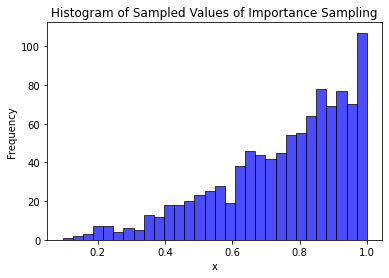

Importance Sampling estimate: 0.33333333333333326, Absolute error: 5.551115123125783e-17


In [9]:
# Integration parameters
a, b = 0, 1
n_samples = 10 ** 3
true_value = 1/3
strata = 10

# Monte Carlo Integration
mc_estimate, mc_error = monte_carlo_integration(f, a, b, n_samples, true_value)
print(f"Monte Carlo estimate: {mc_estimate}, Absolute error: {mc_error}")

# Stratified Sampling Integration
stratified_estimate, stratified_error = stratified_sampling(f, a, b, n_samples, strata, true_value)
print(f"Stratified Sampling estimate: {stratified_estimate}, Absolute error: {stratified_error}")

# Importance Sampling Integration
importance_estimate, importance_error = importance_sampling(f, a, b, n_samples, true_value, importance_dist)
print(f"Importance Sampling estimate: {importance_estimate}, Absolute error: {importance_error}")

**效果：重要采样 > 分层抽样 > 普通抽样**

此处的重要性采样，我取的函数其实就是 $ 3 x^2 $，我只是想看看这样会发生啥。

P.S.: Importance Sampling is indeed very simple:

$$
\int f(x) dx = \int \frac{f(x)}{g(x)} g(x) dx = <\frac{f(x)}{g(x)}>_X, \ X \sim g(x)
$$

## Estimating $\int_0^4 x^2 e^{-x} dx$

See `Why_Metropolis.ipynb` for making this figure

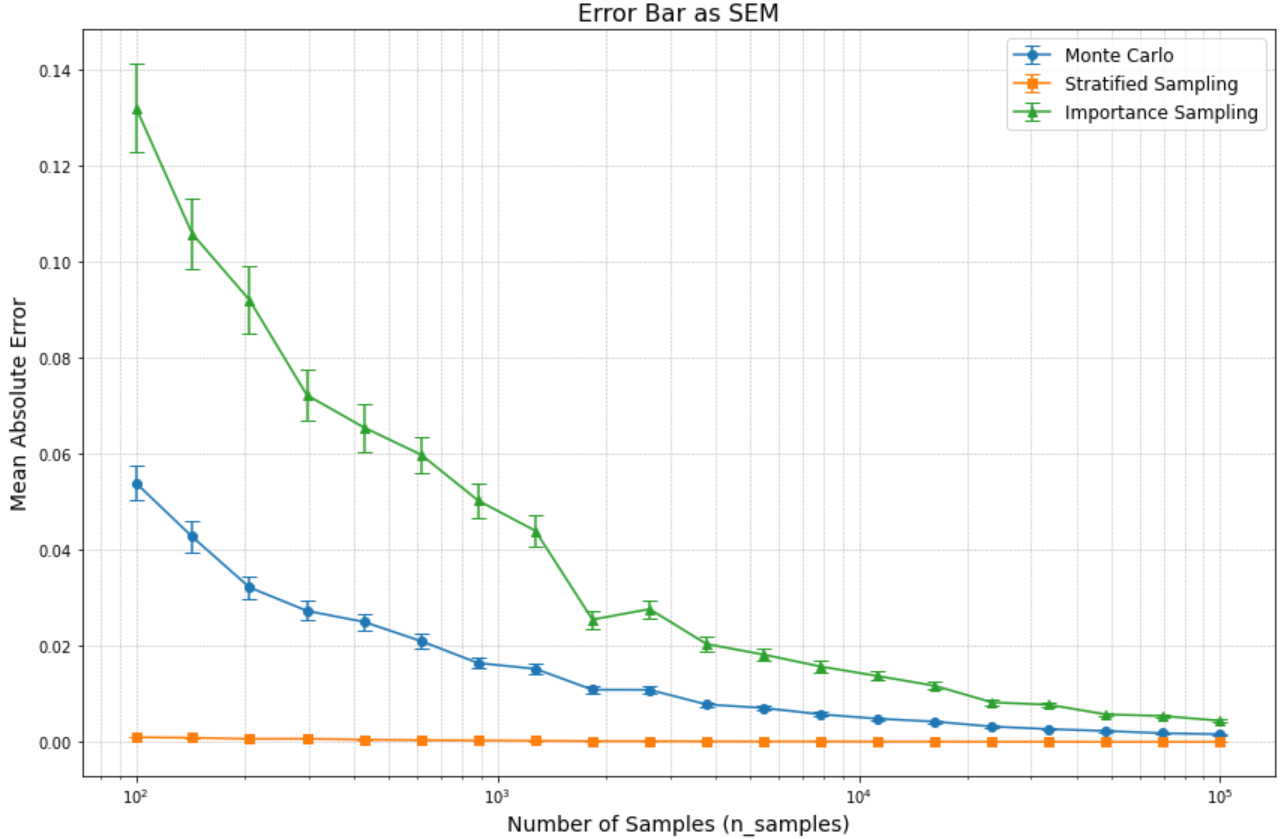

## Proof of Bias = 0 in Monte Carlo

For Estimating $\pi$

$$
E(\hat{\pi}) = 4 \frac{E(k)}{n} = 4 \frac{np}{n} = 4 p = 4 \frac{\pi}{4} = \pi
$$

where
* The probability p that a randomly chosen point falls inside the quarter-circle is $\frac{\pi}{4}$
* The count k follows a binomial distribution $Binomial(n,p)$.

For Estimatinve an integral $I = \int_a^b f(x) dx$.

We will sample n independant random variables $X_1, X_2, ..., X_n$ uniformly from [a, b].

Our estimator is $\hat{I} = (b - a) \frac{\sum_i(f(X_i))}{n}$

And $E(f(X_i)) = \frac{1}{b-a} I$

Then $E(\hat{I}) = (b-a)\frac{1}{n}n \frac{1}{b-a} I = I$

Above, we prove that in these two special cases the Bias = 0.

以上，我们证明了在这两种特殊情况下Bias为0。我相信在分层抽样、重要抽样这些方法下Bias也是0。

## Some Connections

### Senior High School

此处的分层抽样和高中学的是一个意思。

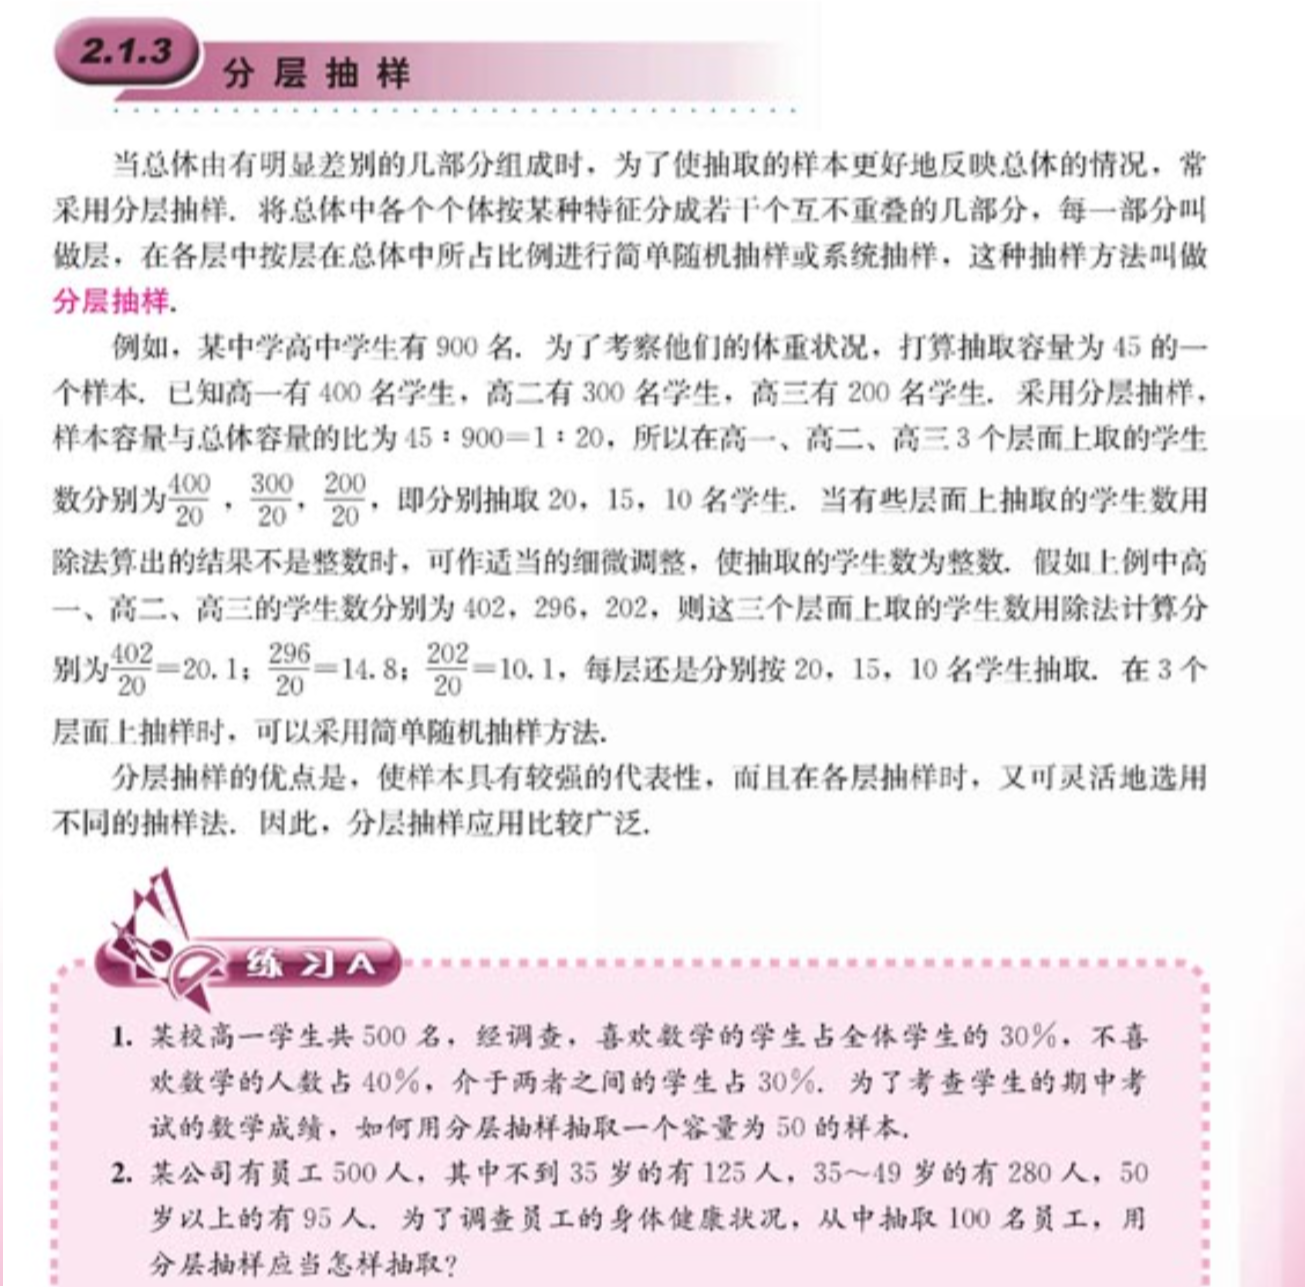

### Junior High School

此处的普通MC和初中学的简单随机抽样是一个意思

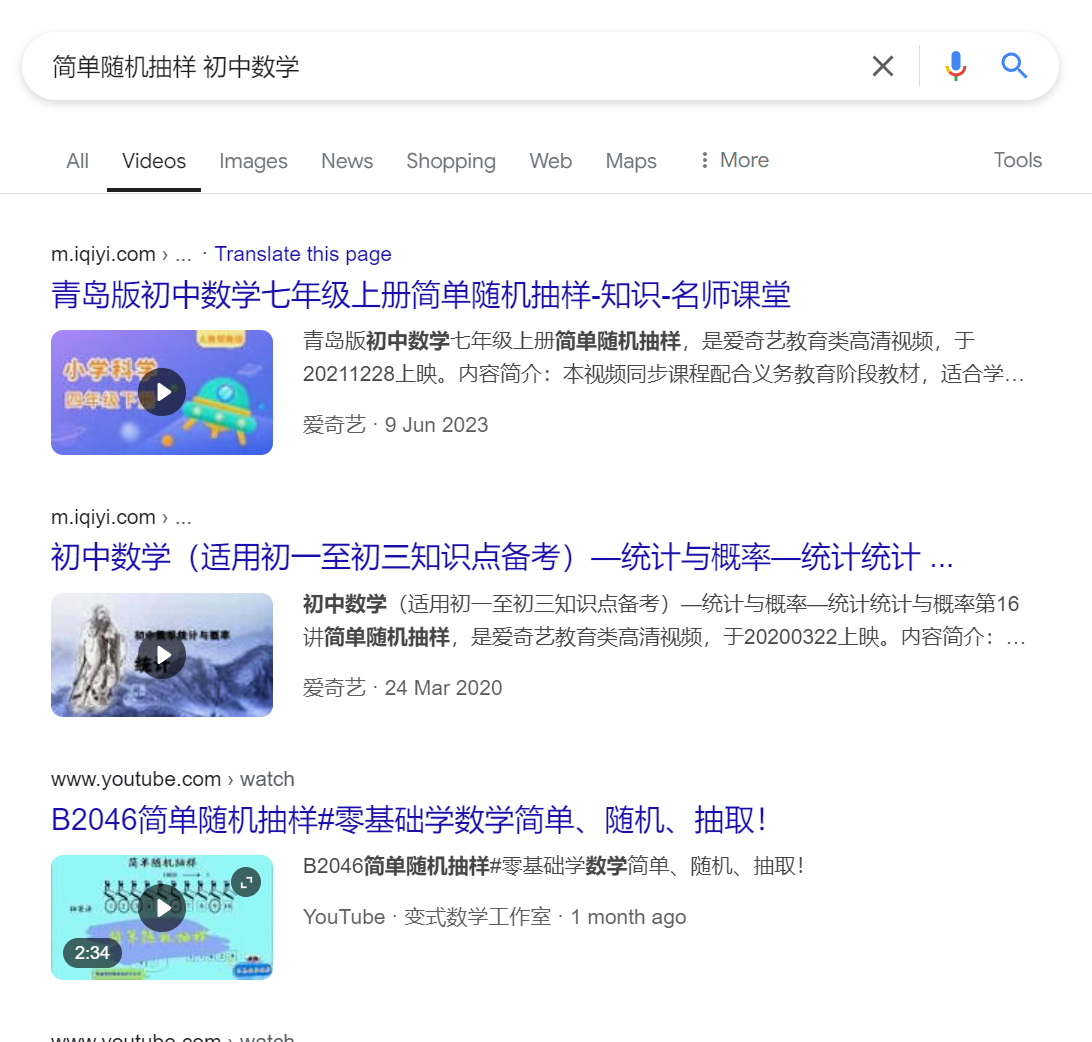

### Riemann Integral

希望大家还记得，黎曼积分把积分区间分成很多bin，每个bin选一个点。从这一角度看，分层抽样介于黎曼积分和普通蒙特卡洛抽样之间。